# Loading Dataset

In [1]:
import tensorflow
tensorflow.__version__

'2.19.0'

In [27]:
import matplotlib as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # One nueron in layer is connected to another nueron in next layer
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Text(0.5, 1.0, 'Label: 5')

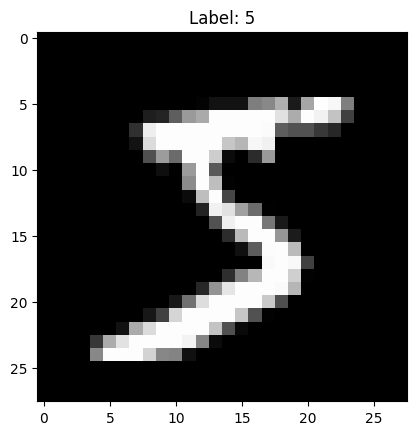

In [12]:
plt.pyplot.imshow(X_train[0], cmap='gray')
plt.pyplot.title('Label: {}'.format(y_train[0]))

In [ ]:
X_train.shape # 60000 images in dataset, each of size 28x28 pixels

(60000, 28, 28)

In [18]:
X_train = X_train.reshape(60000, 28 * 28) # Reshape to 2D array
X_train.shape

(60000, 784)

In [19]:
X_test = X_test.reshape(10000, 28 * 28) # Reshape to 2D array
X_test.shape

(10000, 784)

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [24]:
X_train /= 255.0 # Normalize pixel values to [0, 1]
X_test /= 255.0 # Normalize pixel values to [0, 1]

In [25]:
X_train.max(), X_train.min() # Check if normalization worked

(np.float32(1.0), np.float32(0.0))

In [28]:
y_train = to_categorical(y_train) # Convert labels to one-hot encoding

In [29]:
y_test = to_categorical(y_test) # Convert labels to one-hot encoding

# Nueral Network Training

In [ ]:
(784 + 10)/2 # Calculate average number of nuerons in the hidden layer

397.0

In [32]:
# 784 -> 397 -> 397 -> 10
network = Sequential()
network.add(Dense(input_shape=(784,), units=397, activation='relu')) # Input layer with 784 inputs, hidden layer with 397 neurons
network.add(Dense(units=397, activation='relu')) # Hidden layer with 397 neurons
network.add(Dense(units=10, activation='softmax')) # Output layer with 10 neurons (one for each digit)
# https://keras.io/api/losses
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the model with loss function, optimizer and metrics

c:\Users\vishulaw\Workspace\genai-sandbox\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
history = network.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9298 - loss: 0.2387
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9745 - loss: 0.0845
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9829 - loss: 0.0540
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9879 - loss: 0.0381
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9910 - loss: 0.0281
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9932 - loss: 0.0210
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9930 - loss: 0.0206
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9937 - loss: 0.0179
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9957 - loss: 0.0136
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9952 - loss: 0.0135


# Nueral Network Evaluation

In [34]:
history.history.keys() # Check the keys in history object

dict_keys(['accuracy', 'loss'])

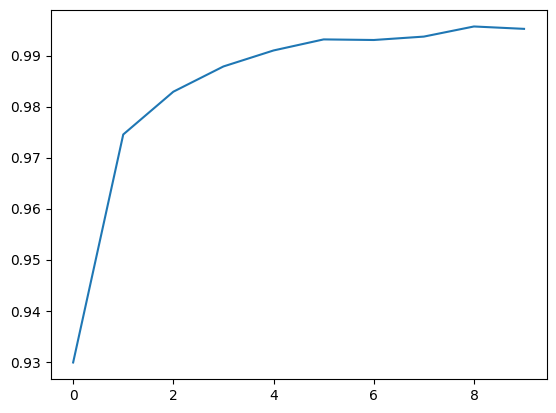

In [35]:
plt.pyplot.plot(history.history['accuracy'])

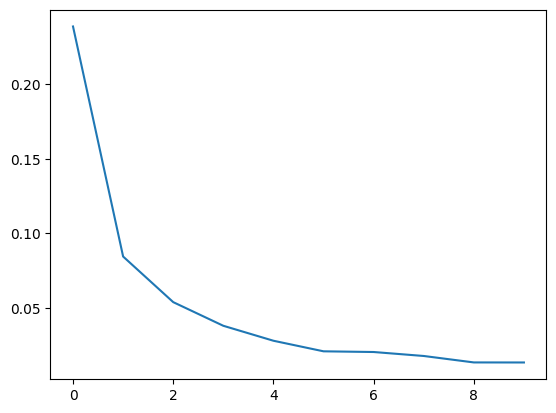

In [36]:
plt.pyplot.plot(history.history['loss'])

In [38]:
accuracy_test = network.evaluate(X_test, y_test) # Evaluate the model on test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9816 - loss: 0.0757


In [39]:
predictions = network.predict(X_test) # Make predictions on test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
predictions[0] # Check predictions for first test image
# Prints 10 values for each nuerons

array([1.0111291e-12, 6.5933464e-10, 2.8241487e-09, 3.7864265e-07,
       1.9850098e-13, 2.1206177e-10, 1.8149685e-13, 9.9999964e-01,
       3.7340744e-09, 1.2221090e-08], dtype=float32)

Text(0.5, 1.0, 'Predicted: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

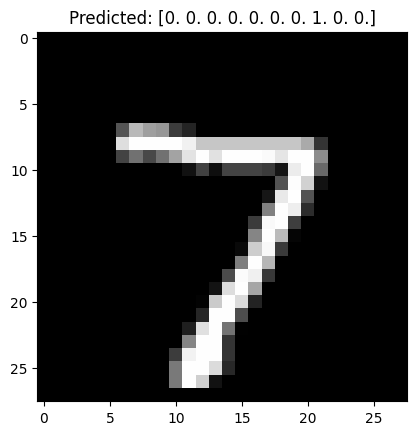

In [41]:
plt.pyplot.imshow(X_test[0].reshape(28, 28), cmap='gray') # Display the first test image
plt.pyplot.title('Predicted: {}'.format(y_test[0])) # Display predicted label for the first test image

In [42]:
np.argmax(predictions[0]) # Get the index of the highest value in predictions for the first test image

np.int64(7)